In [1]:
import numpy as np
import syndat
import pandas as pd
import os
from matplotlib.pyplot import *
import PiTFAll as pf
import h5py


In [2]:
%matplotlib widget

In [3]:
# Peformance Test for Fitting ALgorithm (PiTFALl)

In [4]:
# Initialize particle pair and quantup spin groups of interest

ac = 0.81271    # scattering radius in 1e-12 cm 
M = 180.948030  # amu of target nucleus
m = 1           # amu of incident neutron
I = 3.5         # intrinsic spin, positive parity
i = 0.5         # intrinsic spin, positive parity [sic: perhaps, angular momentum?]
l_max = 1       # highest order l-wave to consider

spin_groups = [ (3.0,1,0) ] # (4.0,1,0) 
average_parameters = pd.DataFrame({ 'dE'    :   {'3.0':8.79, '4.0':4.99},
                                    'Gg'    :   {'3.0':46.4, '4.0':35.5},
                                    'gn2'    :   {'3.0':64.0, '4.0':64.0}  })

Ta_pair = syndat.particle_pair( ac, M, m, I, i, l_max,
                                spin_groups=spin_groups, average_parameters=average_parameters,
                                input_options={})


In [5]:

# initialize experimental setup
E_min_max = [100, 150]
input_options = { 'Add Noise': True,
            'Sample TURP':True,
            'Sample TOCS':True, 
            'Calculate Covariance': False,
            'Compression Points':[],
            'Grouping Factors':None}

experiment_parameters = {'bw': {'val':0.3,    'unc'   :   0}}

exp = syndat.experiment(E_min_max, 
                        input_options=input_options, 
                        experiment_parameters=experiment_parameters)
len(exp.energy_domain)

156

In [6]:
# run a performance test with the PiTFAll module

case_file = './perf_test_baron.hdf5'
number_of_datasets = 50

path_to_application_exe = '/Applications/MATLAB_R2021b.app/bin/matlab'
path_to_fitting_script = "/Users/noahwalton/Documents/GitHub/ATARI/baron_fit_rev1.m"

input_options = {   'Overwrite Syndats'    :   False, 
                    'Overwrite Fits'       :   False    } 

perf_test = pf.performance_test(number_of_datasets,
                                case_file,
                                input_options=input_options)

perf_test.generate_syndats(Ta_pair, exp, 
                            solver='syndat_SLBW')

In [7]:
# test accessing generated data
# pd.read_hdf(case_file, 'sample_0/syndat_par')
# pd.read_hdf(case_file, 'test_stats/sample_data')


In [8]:
out = perf_test.generate_fits(False)
print(out)

User chose to NOT run the fitting algorithm locally. The case_file.hdf5 has been prepared based on the selected overwrite options.Please run samples 0-50


In [9]:
# # import h5py
# f = h5py.File(case_file, 'r+')
# # del f['sample_0']['fit_par']
# # del f['sample_0']['fit_pw']
# # print(f['sample_0'].keys())
# print(f['test_stats/sample_data'].keys())
# f.close()


In [10]:
# integral_FoMs, sample_data = perf_test.analyze()
# pd.read_hdf(case_file, 'integral_FoMs')

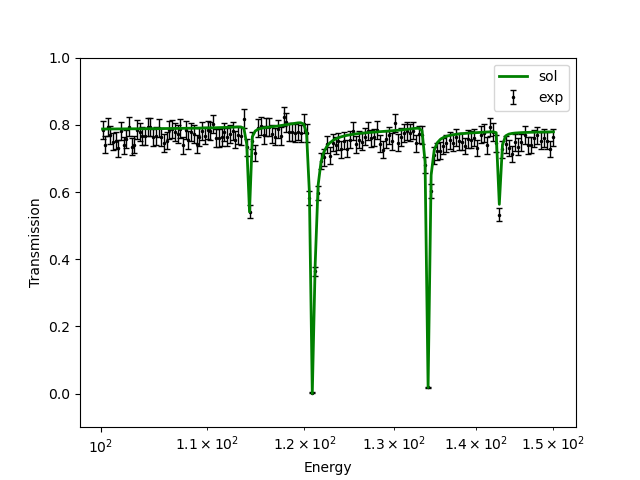

In [11]:
# figure()
# bins = hist(integral_FoMs.fit_theo_SE, bins=20)
pf.sample_case.plot_trans(case_file, 0, False)